# importando dados

In [2]:
import os
import pandas as pd
import numpy as np
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sqlalchemy import create_engine
from google.colab import drive

In [3]:
df_cliente = pd.read_csv('/content/drive/MyDrive/VAI/Projeto Final/Dados/cliente.csv')
df_produto = pd.read_csv('/content/drive/MyDrive/VAI/Projeto Final/Dados/produto.csv')
df_venda = pd.read_csv('/content/drive/MyDrive/VAI/Projeto Final/Dados/venda.csv')

<ipython-input-3-d6e0fe299ed8>:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_venda = pd.read_csv('/content/drive/MyDrive/VAI/Projeto Final/Dados/venda.csv')


# Cliente

In [4]:
df_cliente

,ID_CLIENTE,SEXO,DATA_NASCIMENTO,PRIMEIRA_COMPRA
0,0,,1900/01/01,2017/03/06
1,1,,1900/01/01,2017/03/06
2,2,,1900/01/01,2017/03/06
3,3,,1900/01/01,2017/02/18
4,4,,1900/01/01,2017/01/16
...,...,...,...,...
105919,105919,F,1977/09/11,2021/10/16
105920,105920,,1900/01/01,1900/01/01
105921,105921,,1900/01/01,1900/01/01
105922,105922,F,1985/05/15,2021/10/16


In [9]:
df_cliente['SEXO'].value_counts(dropna=False)
#O que seignigicam as legendas da coluna SEXO, F, M, O, f, m e ' '

     59401
F    26809
M    17384
O     1307
f      575
m      448
Name: SEXO, dtype: int64

In [10]:
df_cliente['DATA_NASCIMENTO'].value_counts(dropna=False)
#Data de nascimento com tem muitos erros, em que momento ( site, app, nas lojas etc) e quem faz os cadastros dos clientes ?


1900/01/01    60579
2020/08/13       43
2020/08/15       37
2020/08/14       32
2000/01/01       27
              ...  
1983/07/12        1
1973/03/12        1
1947/11/24        1
2007/11/07        1
1962/12/16        1
Name: DATA_NASCIMENTO, Length: 16377, dtype: int64

In [11]:
df_cliente['PRIMEIRA_COMPRA'].value_counts(dropna=False)
#como é feito o registro dos dias da primeira compra ?

1900/01/01    4060
2020/11/14     319
2020/12/12     274
2020/11/21     270
2020/11/28     267
              ... 
2017/03/20       1
2019/02/10       1
2019/05/29       1
2017/01/16       1
2017/01/30       1
Name: PRIMEIRA_COMPRA, Length: 1693, dtype: int64

In [12]:
df_cliente[df_cliente['DATA_NASCIMENTO'] == df_cliente['PRIMEIRA_COMPRA']]

,ID_CLIENTE,SEXO,DATA_NASCIMENTO,PRIMEIRA_COMPRA
63,63,,1900/01/01,1900/01/01
92,92,,1900/01/01,1900/01/01
133,133,,1900/01/01,1900/01/01
151,151,,1900/01/01,1900/01/01
173,173,,1900/01/01,1900/01/01
...,...,...,...,...
105803,105803,,1900/01/01,1900/01/01
105830,105830,,1900/01/01,1900/01/01
105852,105852,,1900/01/01,1900/01/01
105920,105920,,1900/01/01,1900/01/01


# venda


In [13]:
df_venda

,ID_VENDA,DATA_VENDA,ID_CLIENTE,ID_PRODUTO,QUANTIDADE,CATEGORIA_VENDA,FILIAL
0,0,2021/02/10,45659.0,17631,1,E-COMMERCE,101
1,0,2021/02/10,45659.0,34575,1,E-COMMERCE,101
2,1,2021/02/12,70766.0,2240,1,E-COMMERCE,101
3,2,2021/02/12,42579.0,17707,1,E-COMMERCE,101
4,2,2021/02/12,42579.0,8952,1,E-COMMERCE,101
...,...,...,...,...,...,...,...
1859578,854530,2021/10/23,NaN,36642,10.0,Loja,113
1859579,854530,2021/10/23,NaN,7332,10.0,Loja,113
1859580,854530,2021/10/23,NaN,7333,10.0,Loja,113
1859581,854531,2021/10/23,106865.0,7528,1.0,Loja,113


In [14]:
df_venda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1859583 entries, 0 to 1859582
Data columns (total 7 columns):
 #   Column           Dtype  
---  ------           -----  
 0   ID_VENDA         int64  
 1   DATA_VENDA       object 
 2   ID_CLIENTE       float64
 3   ID_PRODUTO       int64  
 4   QUANTIDADE       object 
 5   CATEGORIA_VENDA  object 
 6   FILIAL           int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 99.3+ MB


In [15]:
df_venda.CATEGORIA_VENDA.unique()

array(['E-COMMERCE          ', 'Loja                ',
       'Digital             ', 'Estética            ',
       'Clínica             '], dtype=object)

In [16]:
df_venda['QUANTIDADE'].value_counts(dropna=False)

1        921903
1        587741
2         90614
2         56416
3         20494
          ...  
1,890         1
1,555         1
1,485         1
1,710         1
131.0         1
Name: QUANTIDADE, Length: 2895, dtype: int64

In [17]:
df_venda.DATA_VENDA = pd.to_datetime(df_venda.DATA_VENDA)

In [18]:
df_venda['DATA_VENDA'].max()

Timestamp('2021-10-26 00:00:00')

In [19]:
df_venda['DATA_VENDA'].min()

Timestamp('2020-01-02 00:00:00')

In [20]:
df_venda['CATEGORIA_VENDA'].value_counts()

Loja                    1698909
Estética                  91187
Clínica                   37179
E-COMMERCE                18101
Digital                   14207
Name: CATEGORIA_VENDA, dtype: int64

# Produto

In [21]:
df_produto

,ID_PRODUTO,UNIDADE,NIVEL 1,NIVEL 2,NIVEL 3,NIVEL 4
0,0,UN,CAES,ALIMENTOS,PETISCOS E OSSINHOS,BISCOITOS - BIFINHOS - SNACKS
1,1,UN,CAES,ALIMENTOS,PETISCOS E OSSINHOS,BISCOITOS - BIFINHOS - SNACKS
2,2,UN,CAES,ALIMENTOS,PETISCOS E OSSINHOS,BISCOITOS - BIFINHOS - SNACKS
3,3,UN,,,,
4,4,UN,CAES,FARMACIA,DORES E INFECCOES,ANTIBIOTICOS
...,...,...,...,...,...,...
38303,38303,UN,,,,
38304,38304,UN,,,,
38305,38305,UN,,,,
38306,38306,UN,,,,


In [22]:
df_produto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38308 entries, 0 to 38307
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID_PRODUTO  38308 non-null  int64 
 1   UNIDADE     38308 non-null  object
 2   NIVEL 1     38308 non-null  object
 3   NIVEL 2     38308 non-null  object
 4   NIVEL 3     38308 non-null  object
 5   NIVEL 4     38308 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.8+ MB


In [23]:
df_produto['UNIDADE'].value_counts()

UN    37848
PC      264
CX       55
DP       36
DS       23
SC       19
EA       12
FR        8
FD        7
CT        7
BA        5
PT        4
1         4
CR        3
MT        2
pc        2
KG        2
PE        2
BS        1
KI        1
DZ        1
CJ        1
PA        1
Name: UNIDADE, dtype: int64

In [24]:
df_produto['NIVEL 1'].value_counts()

CAES                              18809
                                  12569
GATOS                              2568
PEIXES                             2088
AVES                               1225
ROEDORES                            596
PESSOAS                             411
CAVALOS                              39
PRIMATAS                              3
Name: NIVEL 1, dtype: int64

In [25]:
df_produto['NIVEL 2'].value_counts()

ACESSORIOS                        16145
                                  12569
ALIMENTOS                          3703
HIGIENE E BELEZA                   2013
FARMACIA                           1857
AQUARIOS E ACESSORIOS              1257
ANIMAL VIVO                         540
CASA                                224
Name: NIVEL 2, dtype: int64

In [26]:
df_produto['NIVEL 3'].value_counts()

                                  13199
BRINQUEDOS                         3559
COLEIRAS E PEITORAIS               3527
ROUPINHAS E ACESSORIOS             3103
RACOES                             2705
CAMINHAS E CASINHAS                2170
ACESSORIOS PARA ALIMENTACAO        1759
UTENSILIOS PARA BANHO              1197
GAIOLAS E ACESSORIOS               1053
HIGIENE E LIMPEZA                   816
PETISCOS E OSSINHOS                 751
DECORACAO E ILUMINACAO              566
BOMBAS E CONDICIONADORES            525
TRANSPORTE E VIAGEM                 523
VITAMINAS E SUPLEMENTOS             449
ACESSORIOS MEDICOS                  418
PULGAS - CARRAPATOS - VERMES        298
DORES E INFECCOES                   260
ADESTRAMENTO E COMPORTAMENTO        254
PELE E PELAGEM                      185
AQUARIOS                            166
PORTOES - GRADES - ESCADAS          107
DECORACAO                            99
RACOES - FENOS - ALFAFAS             98
OLHOS E ORELHAS                      92


In [27]:
df_produto['NIVEL 4'].value_counts()

                                  16906
MODA VERAO                         1638
CAMINHAS                           1520
PEITORAIS                          1509
COMEDOUROS E BEBEDOUROS            1468
                                  ...  
TRATAMENTO PARA OLHOS                26
TRATAMENTO CARDIACO                  18
ESCADAS                              18
TRATAMENTO RESPIRATORIO               2
TRATAMENTO PARA CASCOS                1
Name: NIVEL 4, Length: 63, dtype: int64

# demanda podutos caes

essa celula eu estava focando na questão 1, então n tem muita relevancia na questão 2

In [28]:
df_caes = df_produto[df_produto['NIVEL 1'] == 'CAES                          ']

In [29]:
df_caes['ID_PRODUTO']

0            0
1            1
2            2
4            4
5            5
         ...  
38196    38196
38197    38197
38211    38211
38212    38212
38213    38213
Name: ID_PRODUTO, Length: 18809, dtype: int64

In [30]:


df_venda_caes = df_venda[df_venda['ID_PRODUTO'].isin(df_caes['ID_PRODUTO'])]



In [31]:
df_venda_caes

,ID_VENDA,DATA_VENDA,ID_CLIENTE,ID_PRODUTO,QUANTIDADE,CATEGORIA_VENDA,FILIAL
0,0,2021-02-10,45659.0,17631,1,E-COMMERCE,101
1,0,2021-02-10,45659.0,34575,1,E-COMMERCE,101
2,1,2021-02-12,70766.0,2240,1,E-COMMERCE,101
3,2,2021-02-12,42579.0,17707,1,E-COMMERCE,101
4,2,2021-02-12,42579.0,8952,1,E-COMMERCE,101
...,...,...,...,...,...,...,...
1859572,854528,2021-10-24,106864.0,4104,1.0,Loja,113
1859573,854528,2021-10-24,106864.0,4001,1.0,Loja,113
1859574,854528,2021-10-24,106864.0,31589,1.0,Loja,113
1859581,854531,2021-10-23,106865.0,7528,1.0,Loja,113


In [32]:

df_venda_caes['DATA_VENDA'].max()

Timestamp('2021-10-25 00:00:00')

In [33]:
df_venda_caes['DATA_VENDA'].min()

Timestamp('2020-01-02 00:00:00')

In [34]:
# Ordenar o DataFrame com base na coluna 'data' da mais recente para a mais antiga
#df_venda_caes = df_venda_caes.sort_values(by='DATA_VENDA', ascending=False)

In [35]:
df_venda_caes

,ID_VENDA,DATA_VENDA,ID_CLIENTE,ID_PRODUTO,QUANTIDADE,CATEGORIA_VENDA,FILIAL
0,0,2021-02-10,45659.0,17631,1,E-COMMERCE,101
1,0,2021-02-10,45659.0,34575,1,E-COMMERCE,101
2,1,2021-02-12,70766.0,2240,1,E-COMMERCE,101
3,2,2021-02-12,42579.0,17707,1,E-COMMERCE,101
4,2,2021-02-12,42579.0,8952,1,E-COMMERCE,101
...,...,...,...,...,...,...,...
1859572,854528,2021-10-24,106864.0,4104,1.0,Loja,113
1859573,854528,2021-10-24,106864.0,4001,1.0,Loja,113
1859574,854528,2021-10-24,106864.0,31589,1.0,Loja,113
1859581,854531,2021-10-23,106865.0,7528,1.0,Loja,113


In [36]:
s = df_venda_caes['DATA_VENDA'].asfreq('D')
s1 = pd.Series(s[s.isnull()].index)


In [37]:
s1

0   1970-01-01
dtype: datetime64[ns]

In [38]:
df_venda_caes[df_venda_caes['DATA_VENDA'] == '1970-01-01']

,ID_VENDA,DATA_VENDA,ID_CLIENTE,ID_PRODUTO,QUANTIDADE,CATEGORIA_VENDA,FILIAL


In [39]:

# Calcule a diferença entre as datas para identificar os dias ausentes
date_diff = df_venda_caes['DATA_VENDA'].diff()

# Encontre a primeira e última data no DataFrame
first_date = df_venda_caes['DATA_VENDA'].iloc[0]
last_date = df_venda_caes['DATA_VENDA'].iloc[-1]

# Verifique se a diferença entre as datas contém algum valor diferente de 1 dia
missing_days = date_diff[date_diff != pd.Timedelta(days=1)]

# Verifique se não há dias ausentes entre a primeira e a última data
if len(missing_days) == 0 and len(df_venda_caes['DATA_VENDA']) == (last_date - first_date).days + 1:
    print("Todas as linhas contêm todos os dias desde o primeiro registro até o último.")
else:
    print("Existem dias ausentes nas linhas do DataFrame.")
    print(missing_days.sort_values())

Existem dias ausentes nas linhas do DataFrame.
558710   -662 days
886873   -662 days
101592   -657 days
101699   -657 days
101670   -657 days
            ...   
98988     654 days
100811    655 days
101843    657 days
101524    657 days
0              NaT
Name: DATA_VENDA, Length: 1221609, dtype: timedelta64[ns]


# SEguimentação

###IDEAL: tentar adicionar essas novas colunas idade, primeira compra, ultima compra, frequencia de pedidos, recencia, quantidade de produtos por pedido, tempo de base em dias, sexo.

In [41]:
df_venda

,ID_VENDA,DATA_VENDA,ID_CLIENTE,ID_PRODUTO,QUANTIDADE,CATEGORIA_VENDA,FILIAL
0,0,2021-02-10,45659.0,17631,1,E-COMMERCE,101
1,0,2021-02-10,45659.0,34575,1,E-COMMERCE,101
2,1,2021-02-12,70766.0,2240,1,E-COMMERCE,101
3,2,2021-02-12,42579.0,17707,1,E-COMMERCE,101
4,2,2021-02-12,42579.0,8952,1,E-COMMERCE,101
...,...,...,...,...,...,...,...
1859578,854530,2021-10-23,NaN,36642,10.0,Loja,113
1859579,854530,2021-10-23,NaN,7332,10.0,Loja,113
1859580,854530,2021-10-23,NaN,7333,10.0,Loja,113
1859581,854531,2021-10-23,106865.0,7528,1.0,Loja,113


In [42]:
# Removendo as linhas com valores NaN na coluna
df_venda = df_venda.dropna(subset=['ID_CLIENTE'])

# Convertendo a coluna  de float para int
df_venda['ID_CLIENTE'] = df_venda['ID_CLIENTE'].astype(int)

df_venda

<ipython-input-42-8d434fcf80cc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_venda['ID_CLIENTE'] = df_venda['ID_CLIENTE'].astype(int)


,ID_VENDA,DATA_VENDA,ID_CLIENTE,ID_PRODUTO,QUANTIDADE,CATEGORIA_VENDA,FILIAL
0,0,2021-02-10,45659,17631,1,E-COMMERCE,101
1,0,2021-02-10,45659,34575,1,E-COMMERCE,101
2,1,2021-02-12,70766,2240,1,E-COMMERCE,101
3,2,2021-02-12,42579,17707,1,E-COMMERCE,101
4,2,2021-02-12,42579,8952,1,E-COMMERCE,101
...,...,...,...,...,...,...,...
1859572,854528,2021-10-24,106864,4104,1.0,Loja,113
1859573,854528,2021-10-24,106864,4001,1.0,Loja,113
1859574,854528,2021-10-24,106864,31589,1.0,Loja,113
1859575,854529,2021-10-23,106859,38290,1.0,Loja,113


In [43]:
df_venda['CATEGORIA_VENDA'].value_counts()

Loja                    770313
Estética                 90930
Clínica                  36902
E-COMMERCE               18101
Digital                  13471
Name: CATEGORIA_VENDA, dtype: int64

##  Vou adicionar novas colunas no df_cliente

In [44]:
df_cliente

,ID_CLIENTE,SEXO,DATA_NASCIMENTO,PRIMEIRA_COMPRA
0,0,,1900/01/01,2017/03/06
1,1,,1900/01/01,2017/03/06
2,2,,1900/01/01,2017/03/06
3,3,,1900/01/01,2017/02/18
4,4,,1900/01/01,2017/01/16
...,...,...,...,...
105919,105919,F,1977/09/11,2021/10/16
105920,105920,,1900/01/01,1900/01/01
105921,105921,,1900/01/01,1900/01/01
105922,105922,F,1985/05/15,2021/10/16


In [45]:
#ADICIONAR COLUNA COM A DATA DA ULTIMA COMPRA DO CLIENTE

# Convertendo a coluna 'DATA_VENDA' para o formato datetime
df_venda['DATA_VENDA'] = pd.to_datetime(df_venda['DATA_VENDA'])

# Encontrando a data da última compra para cada cliente
ultima_compra = df_venda.groupby('ID_CLIENTE')['DATA_VENDA'].max().reset_index()

# Renomeando a coluna para 'ULTIMA_COMPRA'
ultima_compra.rename(columns={'DATA_VENDA': 'ULTIMA_COMPRA'}, inplace=True)

# Mesclando os DataFrames df_cliente e ultima_compra com base na coluna 'ID_CLIENTE'
df_cliente = df_cliente.merge(ultima_compra, on='ID_CLIENTE', how='left')

df_cliente


<ipython-input-45-9bba94994e69>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_venda['DATA_VENDA'] = pd.to_datetime(df_venda['DATA_VENDA'])


,ID_CLIENTE,SEXO,DATA_NASCIMENTO,PRIMEIRA_COMPRA,ULTIMA_COMPRA
0,0,,1900/01/01,2017/03/06,NaT
1,1,,1900/01/01,2017/03/06,NaT
2,2,,1900/01/01,2017/03/06,NaT
3,3,,1900/01/01,2017/02/18,NaT
4,4,,1900/01/01,2017/01/16,NaT
...,...,...,...,...,...
105919,105919,F,1977/09/11,2021/10/16,2021-10-16
105920,105920,,1900/01/01,1900/01/01,2021-10-19
105921,105921,,1900/01/01,1900/01/01,2021-10-22
105922,105922,F,1985/05/15,2021/10/16,2021-10-16


com gerou  valores NAN, acredito q nem todos os clientes cadastrados na tabela cliente estão na tabela venda ( verifiquei e se confirmou )

In [46]:
#CHECANDO LINHAS QUE FICARAM NAT
#NENHUMA DATA FOI ENCONTRADA NA TABELA DE VENDA PARA ESSES CLIENTES, LOGO VOU DROPAR TODOS
df_cliente[df_cliente['ULTIMA_COMPRA'].isna() ]

,ID_CLIENTE,SEXO,DATA_NASCIMENTO,PRIMEIRA_COMPRA,ULTIMA_COMPRA
0,0,,1900/01/01,2017/03/06,NaT
1,1,,1900/01/01,2017/03/06,NaT
2,2,,1900/01/01,2017/03/06,NaT
3,3,,1900/01/01,2017/02/18,NaT
4,4,,1900/01/01,2017/01/16,NaT
...,...,...,...,...,...
105827,105827,F,1969/08/28,1900/01/01,NaT
105847,105847,F,1981/08/19,1900/01/01,NaT
105852,105852,,1900/01/01,1900/01/01,NaT
105886,105886,F,1964/12/16,1900/01/01,NaT


In [47]:
# Removendo as linhas com valores NaN na coluna 'ULTIMA_COMPRA'
df_cliente_real = df_cliente.dropna(subset=['ULTIMA_COMPRA'])

df_cliente_real.tail(6)

,ID_CLIENTE,SEXO,DATA_NASCIMENTO,PRIMEIRA_COMPRA,ULTIMA_COMPRA
105918,105918,M,1998/02/14,2021/10/16,2021-10-16
105919,105919,F,1977/09/11,2021/10/16,2021-10-16
105920,105920,,1900/01/01,1900/01/01,2021-10-19
105921,105921,,1900/01/01,1900/01/01,2021-10-22
105922,105922,F,1985/05/15,2021/10/16,2021-10-16
105923,105923,F,1986/09/23,2021/10/16,2021-10-16


In [48]:
df_cliente_real

,ID_CLIENTE,SEXO,DATA_NASCIMENTO,PRIMEIRA_COMPRA,ULTIMA_COMPRA
7,7,,1900/01/01,2017/03/07,2021-05-08
11,11,,1900/01/01,2017/03/07,2021-02-10
13,13,,1900/01/01,2017/03/08,2020-04-24
15,15,,1900/01/01,2019/05/11,2021-08-10
20,20,,1900/01/01,2020/07/31,2021-10-13
...,...,...,...,...,...
105919,105919,F,1977/09/11,2021/10/16,2021-10-16
105920,105920,,1900/01/01,1900/01/01,2021-10-19
105921,105921,,1900/01/01,1900/01/01,2021-10-22
105922,105922,F,1985/05/15,2021/10/16,2021-10-16


In [49]:
#ADICIONAR COLUNA COM A DATA DA PRIMEIRA COMPRA DO CLIENTE


# Encontrando a data da última compra para cada cliente
ultima_compra = df_venda.groupby('ID_CLIENTE')['DATA_VENDA'].min().reset_index()

# Renomeando a coluna para 'ULTIMA_COMPRA'
ultima_compra.rename(columns={'DATA_VENDA': 'PRIMEIRA_COMPRA'}, inplace=True)

# Mesclando os DataFrames df_cliente e ultima_compra com base na coluna 'ID_CLIENTE'
df_cliente_real = df_cliente_real.merge(ultima_compra, on='ID_CLIENTE', how='left')

df_cliente_real

,ID_CLIENTE,SEXO,DATA_NASCIMENTO,PRIMEIRA_COMPRA_x,ULTIMA_COMPRA,PRIMEIRA_COMPRA_y
0,7,,1900/01/01,2017/03/07,2021-05-08,2020-06-15
1,11,,1900/01/01,2017/03/07,2021-02-10,2020-10-15
2,13,,1900/01/01,2017/03/08,2020-04-24,2020-04-24
3,15,,1900/01/01,2019/05/11,2021-08-10,2021-01-08
4,20,,1900/01/01,2020/07/31,2021-10-13,2020-07-31
...,...,...,...,...,...,...
88588,105919,F,1977/09/11,2021/10/16,2021-10-16,2021-10-16
88589,105920,,1900/01/01,1900/01/01,2021-10-19,2021-10-19
88590,105921,,1900/01/01,1900/01/01,2021-10-22,2021-10-22
88591,105922,F,1985/05/15,2021/10/16,2021-10-16,2021-10-16


# Tentei adicionar quantidade de produtos comprados, mas como n segue um padrão de unidade os produtos, vou deixar para fazer isso depois

In [50]:
# Calculando a quantidade total de produtos comprados por cliente
quantidade_produtos_por_cliente = df_venda.groupby('ID_CLIENTE')['QUANTIDADE'].sum().reset_index()

# Mesclando a informação da quantidade de produtos comprados ao DataFrame df_cliente
df_cliente_real = df_cliente_real.merge(quantidade_produtos_por_cliente, on='ID_CLIENTE', how='left')

df_cliente_real

TypeError: ignored

In [ ]:
df_venda['QUANTIDADE'].value_counts().head(50)

# continuando add colunas na tabela, agora Intitulada df_cliente_real

In [51]:
# Calcula recência em dias
data_atual = df_venda.DATA_VENDA.max() # considera ultima data da base para este case
df_cliente_real['RECENCIA'] = (data_atual -  df_venda['DATA_VENDA']).dt.days

In [52]:
df_cliente_real

,ID_CLIENTE,SEXO,DATA_NASCIMENTO,PRIMEIRA_COMPRA_x,ULTIMA_COMPRA,PRIMEIRA_COMPRA_y,RECENCIA
0,7,,1900/01/01,2017/03/07,2021-05-08,2020-06-15,258.0
1,11,,1900/01/01,2017/03/07,2021-02-10,2020-10-15,258.0
2,13,,1900/01/01,2017/03/08,2020-04-24,2020-04-24,256.0
3,15,,1900/01/01,2019/05/11,2021-08-10,2021-01-08,256.0
4,20,,1900/01/01,2020/07/31,2021-10-13,2020-07-31,256.0
...,...,...,...,...,...,...,...
88588,105919,F,1977/09/11,2021/10/16,2021-10-16,2021-10-16,32.0
88589,105920,,1900/01/01,1900/01/01,2021-10-19,2021-10-19,32.0
88590,105921,,1900/01/01,1900/01/01,2021-10-22,2021-10-22,165.0
88591,105922,F,1985/05/15,2021/10/16,2021-10-16,2021-10-16,165.0


In [53]:
#como tem clientes que não estão na basde de clientes e só no registro de vendas e vice-versa, vou dropar os nan que gerou
df_cliente_real = df_cliente_real.dropna(subset=['RECENCIA'])

In [54]:
df_cliente_real

,ID_CLIENTE,SEXO,DATA_NASCIMENTO,PRIMEIRA_COMPRA_x,ULTIMA_COMPRA,PRIMEIRA_COMPRA_y,RECENCIA
0,7,,1900/01/01,2017/03/07,2021-05-08,2020-06-15,258.0
1,11,,1900/01/01,2017/03/07,2021-02-10,2020-10-15,258.0
2,13,,1900/01/01,2017/03/08,2020-04-24,2020-04-24,256.0
3,15,,1900/01/01,2019/05/11,2021-08-10,2021-01-08,256.0
4,20,,1900/01/01,2020/07/31,2021-10-13,2020-07-31,256.0
...,...,...,...,...,...,...,...
88588,105919,F,1977/09/11,2021/10/16,2021-10-16,2021-10-16,32.0
88589,105920,,1900/01/01,1900/01/01,2021-10-19,2021-10-19,32.0
88590,105921,,1900/01/01,1900/01/01,2021-10-22,2021-10-22,165.0
88591,105922,F,1985/05/15,2021/10/16,2021-10-16,2021-10-16,165.0


In [55]:
# dividindo o df e salvando
df_E = df_venda[df_venda['CATEGORIA_VENDA'] == 'E-COMMERCE          ']
df_D = df_venda[df_venda['CATEGORIA_VENDA'] == 'Digital             ']
df_L = df_venda[df_venda['CATEGORIA_VENDA'] == 'Loja                ']
df_Es = df_venda[df_venda['CATEGORIA_VENDA'] == 'Estética            ']
df_C = df_venda[df_venda['CATEGORIA_VENDA'] == 'Clínica             ']

In [56]:
df_E.info()
df_D.info()
df_L.info()
df_Es.info()
df_C.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18101 entries, 0 to 1858983
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ID_VENDA         18101 non-null  int64         
 1   DATA_VENDA       18101 non-null  datetime64[ns]
 2   ID_CLIENTE       18101 non-null  int64         
 3   ID_PRODUTO       18101 non-null  int64         
 4   QUANTIDADE       18101 non-null  object        
 5   CATEGORIA_VENDA  18101 non-null  object        
 6   FILIAL           18101 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 1.1+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 13471 entries, 5924 to 1830493
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ID_VENDA         13471 non-null  int64         
 1   DATA_VENDA       13471 non-null  datetime64[ns]
 2   ID_CLIENTE    

* E 18101
* D 14207
* L 1698909
* Es 91187
* C 37179

TOtal 1.859.583

Como é de se esperar tem o total de linhas da tabela venda, onde loja fisica tem a maior concentração de vendas

Agora vou criar uma nova voluna para cada serviço

In [57]:
# Criando uma coluna booleana para indicar se o cliente comprou no e-comerce
df_cliente_real['E-COMMERCE'] = df_cliente_real['ID_CLIENTE'].isin(df_E['ID_CLIENTE']).astype(int)

# Criando uma coluna booleana para indicar se o cliente comprou na loja
df_cliente_real['LOJA'] = df_cliente_real['ID_CLIENTE'].isin(df_L['ID_CLIENTE']).astype(int)


# Criando uma coluna booleana para indicar se o cliente comprou no digital
df_cliente_real['DIGITAL'] = df_cliente_real['ID_CLIENTE'].isin(df_D['ID_CLIENTE']).astype(int)


# Criando uma coluna booleana para indicar se o cliente comprou na estetica
df_cliente_real['ESTETICA'] = df_cliente_real['ID_CLIENTE'].isin(df_Es['ID_CLIENTE']).astype(int)


# Criando uma coluna booleana para indicar se o cliente comprou na clicica
df_cliente_real['CLINICA'] = df_cliente_real['ID_CLIENTE'].isin(df_C['ID_CLIENTE']).astype(int)


<ipython-input-57-b67b4daaad2b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cliente_real['E-COMMERCE'] = df_cliente_real['ID_CLIENTE'].isin(df_E['ID_CLIENTE']).astype(int)
<ipython-input-57-b67b4daaad2b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cliente_real['LOJA'] = df_cliente_real['ID_CLIENTE'].isin(df_L['ID_CLIENTE']).astype(int)
<ipython-input-57-b67b4daaad2b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [58]:
df_cliente_real

,ID_CLIENTE,SEXO,DATA_NASCIMENTO,PRIMEIRA_COMPRA_x,ULTIMA_COMPRA,PRIMEIRA_COMPRA_y,RECENCIA,E-COMMERCE,LOJA,DIGITAL,ESTETICA,CLINICA
0,7,,1900/01/01,2017/03/07,2021-05-08,2020-06-15,258.0,0,1,0,1,1
1,11,,1900/01/01,2017/03/07,2021-02-10,2020-10-15,258.0,0,1,0,0,0
2,13,,1900/01/01,2017/03/08,2020-04-24,2020-04-24,256.0,0,1,0,0,0
3,15,,1900/01/01,2019/05/11,2021-08-10,2021-01-08,256.0,0,1,0,0,1
4,20,,1900/01/01,2020/07/31,2021-10-13,2020-07-31,256.0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
88588,105919,F,1977/09/11,2021/10/16,2021-10-16,2021-10-16,32.0,0,1,0,0,0
88589,105920,,1900/01/01,1900/01/01,2021-10-19,2021-10-19,32.0,1,0,0,0,0
88590,105921,,1900/01/01,1900/01/01,2021-10-22,2021-10-22,165.0,0,0,0,1,0
88591,105922,F,1985/05/15,2021/10/16,2021-10-16,2021-10-16,165.0,0,1,0,0,0


In [59]:
#Verificando com um id especifico se deu certo
df_venda[df_venda['ID_CLIENTE'] == 7]

,ID_VENDA,DATA_VENDA,ID_CLIENTE,ID_PRODUTO,QUANTIDADE,CATEGORIA_VENDA,FILIAL
14295,11997,2020-06-15,7,38308,35,Estética,101
578599,285508,2020-12-11,7,38321,160,Clínica,102
644543,317729,2020-11-26,7,263,1,Loja,102
690421,336134,2021-05-08,7,7925,1,Loja,102


ID 7 realmente comprou nos tres lugares diferentes

In [60]:
#somando serviços e criando nova colua
df_cliente_real['soma_servico'] = df_cliente_real['E-COMMERCE'] + df_cliente_real['LOJA'] + df_cliente_real['DIGITAL'] + df_cliente_real['ESTETICA'] + df_cliente_real['CLINICA']

<ipython-input-60-5c10b90504be>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cliente_real['soma_servico'] = df_cliente_real['E-COMMERCE'] + df_cliente_real['LOJA'] + df_cliente_real['DIGITAL'] + df_cliente_real['ESTETICA'] + df_cliente_real['CLINICA']


In [61]:
df_cliente_real

,ID_CLIENTE,SEXO,DATA_NASCIMENTO,PRIMEIRA_COMPRA_x,ULTIMA_COMPRA,PRIMEIRA_COMPRA_y,RECENCIA,E-COMMERCE,LOJA,DIGITAL,ESTETICA,CLINICA,soma_servico
0,7,,1900/01/01,2017/03/07,2021-05-08,2020-06-15,258.0,0,1,0,1,1,3
1,11,,1900/01/01,2017/03/07,2021-02-10,2020-10-15,258.0,0,1,0,0,0,1
2,13,,1900/01/01,2017/03/08,2020-04-24,2020-04-24,256.0,0,1,0,0,0,1
3,15,,1900/01/01,2019/05/11,2021-08-10,2021-01-08,256.0,0,1,0,0,1,2
4,20,,1900/01/01,2020/07/31,2021-10-13,2020-07-31,256.0,0,1,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88588,105919,F,1977/09/11,2021/10/16,2021-10-16,2021-10-16,32.0,0,1,0,0,0,1
88589,105920,,1900/01/01,1900/01/01,2021-10-19,2021-10-19,32.0,1,0,0,0,0,1
88590,105921,,1900/01/01,1900/01/01,2021-10-22,2021-10-22,165.0,0,0,0,1,0,1
88591,105922,F,1985/05/15,2021/10/16,2021-10-16,2021-10-16,165.0,0,1,0,0,0,1


# plotando alguns graficos

In [64]:
var_box = 'RECENCIA'

fig = px.box(df_cliente_real, x=var_box)
fig.update_traces(orientation='h')
fig.update_layout(
    xaxis={'title': var_box},
    yaxis={'title': var_box, 'showline': False, 'ticks': ''}
)
fig.show()

In [63]:
var_box = 'soma_servico'

fig = px.box(df_cliente_real, x=var_box)
fig.update_traces(orientation='h')
fig.update_layout(
    xaxis={'title': var_box},
    yaxis={'title': var_box, 'showline': False, 'ticks': ''}
)
fig.show()

# Nova seção

In [65]:
# Base utilizada para clusterização
var_cluster = ['RECENCIA','soma_servico']

df_cluster = df_cliente_real[var_cluster]

# Normalização das variáveis
std_data = StandardScaler().fit_transform(df_cluster)
df_cluster = pd.DataFrame(data=std_data, columns=df_cluster.columns, index=df_cluster.index)

df_cluster.describe()

,RECENCIA,soma_servico
count,6.771300e+04,6.771300e+04
mean,-5.036854e-17,-1.242424e-16
std,1.000007e+00,1.000007e+00
min,-1.523545e+00,-5.862082e-01
25%,-6.815812e-01,-5.862082e-01
50%,-2.633509e-01,-5.862082e-01
75%,7.877277e-01,9.703549e-01
max,2.124964e+00,5.640044e+00


In [66]:
# Cálculo das iterações do k-means (Cotovelo)
# O número de iterações é subjetivo, utilizou-se 26, pois com esse número é possível avaliar
# o ponto de flexão da curva, mas se desejar é possível testar com valor maior ou menor

wcss = {}
for k in range(1, 30):
  print(k)
  kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=200, n_init=10, random_state=3)
  kmeans.fit(df_cluster)
  wcss[k] = kmeans.inertia_

# No código abaixo será gerado o gráfico que permite aplicação do método do "cotovelo"
fig = make_subplots(
    rows=1,
    cols=1,
    subplot_titles=['Método do Cotovelo'],
    shared_xaxes=True,
    shared_yaxes=False)


fig.add_trace(
    go.Scatter(
        x=list(wcss.keys()),
        y=list(wcss.values()),
        mode='lines+markers',
        textposition='top center',
        showlegend=False),
    row=1,
    col=1)

fig.update_xaxes(visible=True, title='No. of clusters',row=1, col=1)
fig.update_yaxes(visible=True, title='Cluster Inertia',row=1, col=1)

fig.update_layout(
  title='Definição do Nº Ideal de Clusters',
  showlegend=False,
  xaxis_showticklabels=True,
  height=400,
  width=800,
  xaxis = dict(
    tickmode = 'linear',
    tick0 = 0,
    dtick = 1))

fig.show()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [67]:
# Definição do DF a ser Clusterizado
df_cluster_km = df_cluster.copy()

# Clusterização
# 3 clusters é apenas uma sugestão inicial, sinta-se a vontade para experimentar outras variações
clus = KMeans(n_clusters=6, init='k-means++', n_init=10, max_iter=300,random_state=3)
clus.fit(df_cluster_km)

# Ajustando as colunas
df_cluster_km.loc[:, 'CLUSTER'] = clus.labels_
df_cluster_km.head()

,RECENCIA,soma_servico,CLUSTER
0,-0.103763,2.526918,2
1,-0.103763,-0.586208,5
2,-0.114769,-0.586208,5
3,-0.114769,0.970355,3
4,-0.114769,0.970355,3


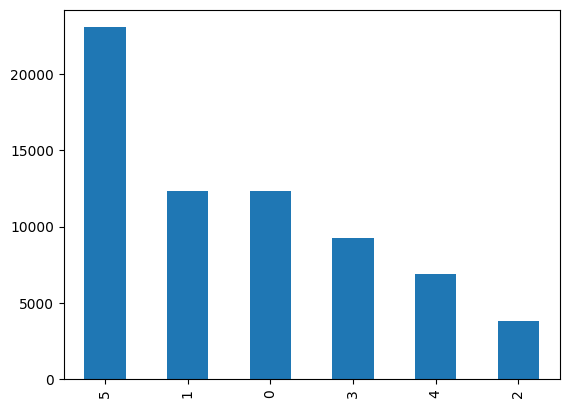

In [68]:
# Volumetria por Categoricas
df_cluster_km['CLUSTER'].value_counts().plot(kind="bar")
plt.show()

In [72]:
# Inserção do cluster na base de clientes
df_cliente_real = pd.concat([df_cliente_real, df_cluster_km[['CLUSTER']]], axis=1)

df_cliente_real.head()

,ID_CLIENTE,SEXO,DATA_NASCIMENTO,PRIMEIRA_COMPRA_x,ULTIMA_COMPRA,PRIMEIRA_COMPRA_y,RECENCIA,E-COMMERCE,LOJA,DIGITAL,ESTETICA,CLINICA,soma_servico,CLUSTER
0,7,,1900/01/01,2017/03/07,2021-05-08,2020-06-15,258.0,0,1,0,1,1,3,2
1,11,,1900/01/01,2017/03/07,2021-02-10,2020-10-15,258.0,0,1,0,0,0,1,5
2,13,,1900/01/01,2017/03/08,2020-04-24,2020-04-24,256.0,0,1,0,0,0,1,5
3,15,,1900/01/01,2019/05/11,2021-08-10,2021-01-08,256.0,0,1,0,0,1,2,3
4,20,,1900/01/01,2020/07/31,2021-10-13,2020-07-31,256.0,0,1,0,1,0,2,3


In [73]:
analise_volumetria = df_cliente_real.groupby('CLUSTER', as_index=False)['ID_CLIENTE'].count()
fig = px.bar(analise_volumetria, x="CLUSTER", y="ID_CLIENTE", title="# Clientes por Cluster")
fig.update_layout(
    width=600,
    height=400,
    showlegend=False)
fig.show()